### APAN5420 Anomaly Detection - Assignment 5

### Name: Kanyarat Suwannama

* **Section1**: Data Preparation
* **Section2**: Logistic regression model with raw features
* **Section3**: Logistic regression model with FE
* **Section4**: Conclusion

# Section 1: Data preparation

In [1]:
import plotly
import matplotlib
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor 

### Use Pandas to do data preparation

In [2]:
df = pd.read_csv("XYZloan_default_selected_vars.csv")

### This is description

In [3]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
79995,79995,79996,79996,0,39,2,1,12,2017/5/7 13:44,android,...,15.0,8.0,864.0,684.0,1261.0,764.0,2600.0,1074.0,11.0,OPPO
79996,79996,79997,79997,0,31,1,4,12,2017/6/2 15:54,ios,...,25.0,25.0,6177.0,6177.0,6426.0,6426.0,6426.0,6426.0,6.0,IPHONE7
79997,79997,79998,79998,0,37,1,1,12,2017/7/9 8:40,android,...,14.0,13.0,1116.0,1116.0,2061.0,2061.0,2501.0,2061.0,12.0,VIVO
79998,79998,79999,79999,0,38,2,1,12,2017/5/9 10:19,android,...,5.0,2.0,25.0,0.0,498.0,343.0,514.0,343.0,6.0,XIAOMI
79999,79999,80000,80000,1,25,1,3,12,2017/4/27 18:36,h5,...,9.0,9.0,129.0,129.0,167.0,167.0,167.0,167.0,7.0,WEB


In [4]:
features = ['loan_default','AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019', 'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']
df = df[features]

<AxesSubplot:>

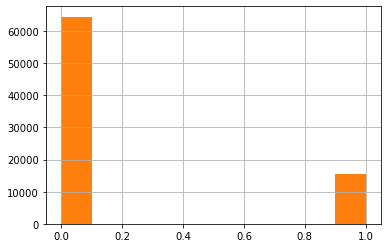

In [5]:
df['loan_default'].hist()
df.loan_default.hist()

In [6]:
df['loan_default'].value_counts()

0    64512
1    15488
Name: loan_default, dtype: int64

In [7]:
df.columns

Index(['loan_default', 'AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019',
       'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010',
       'TD014'],
      dtype='object')

### Heatmap of correlation between variables ###

The correlation heatmap reveals interesting patterns among the variables. The three variables that start with PA exhibit a strong positive correlation with each other, as shown by the brown color. Similarly, the six variables that start with TD also display relatively strong positive correlation with each other, depicted by brown and white shades. The three variables starting with CR show a relatively weak positive correlation, as indicated by light blue and white colors. However, the three variables that start with AP exhibit either negative correlation or very weak positive correlation. It is worth noting that AP001 displays a positive correlation with CR015 and CR019 (0.32 and 0.25) despite being in different groups. On the other hand, all the columns display a very weak positive/negative correlation with the target variable, "loan default". Overall, these correlations provide useful insights for feature selection and engineering in building a model to detect potential loan defaulters.

<AxesSubplot:>

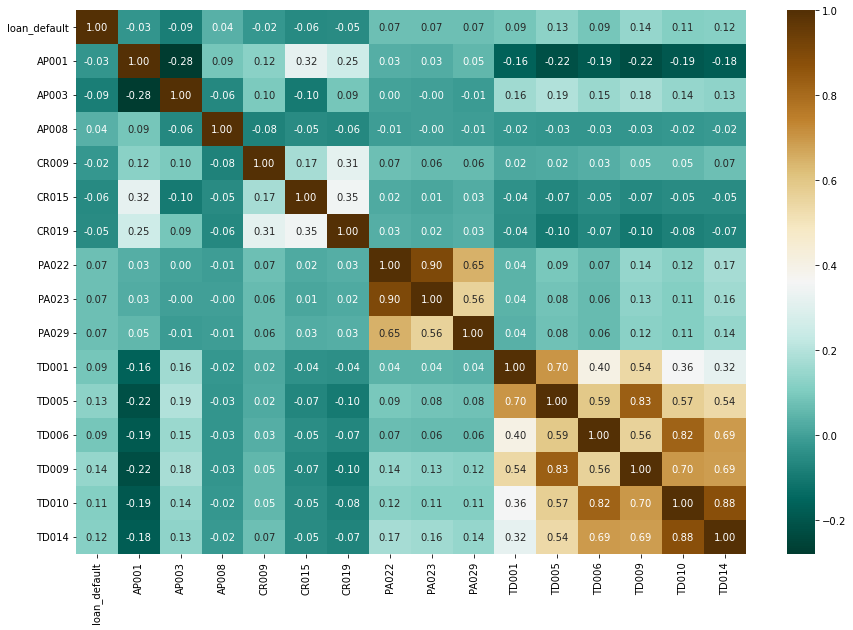

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='BrBG_r', annot=True, fmt='.2f')

In [9]:
df.isnull()

,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
79996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
79997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
79998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values_per = (df.isnull().sum() / df.isnull().count())
pd.concat([missing_values, missing_values_per],axis=1, keys = ['Count_of_Missing','Percentage'])

,Count_of_Missing,Percentage
loan_default,0,0.000000
AP001,0,0.000000
AP003,0,0.000000
AP008,0,0.000000
CR009,0,0.000000
CR015,0,0.000000
CR019,0,0.000000
PA022,381,0.004763
PA023,381,0.004763
PA029,381,0.004763


In [11]:
r = pd.concat([missing_values, missing_values_per],axis=1, keys = ['Count_of_Missing','Percentage']).reset_index()
r

,index,Count_of_Missing,Percentage
0,loan_default,0,0.000000
1,AP001,0,0.000000
2,AP003,0,0.000000
3,AP008,0,0.000000
4,CR009,0,0.000000
5,CR015,0,0.000000
6,CR019,0,0.000000
7,PA022,381,0.004763
8,PA023,381,0.004763
9,PA029,381,0.004763


In [12]:
def null_cell(df):
    dfx = df.copy()
    missing_values = dfx.isnull().sum()
    missing_values_per = dfx.isnull().sum() / dfx.isnull().count()
    null_values = pd.concat([missing_values, missing_values_per],axis=1, keys = ['the_null','the_null_perc'])
    null_values = null_values.sort_values('the_null',ascending=False)
    return null_values[null_values['the_null']>0]

fill_list = (null_cell(df)).index
fill_list

Index(['PA022', 'PA023', 'PA029'], dtype='object')

In [13]:
r.loc[r['index']=='type','Percentage']

Series([], Name: Percentage, dtype: float64)

In [14]:
df_mean = df # Do you know this is different from "df_mean = df.copy()?"" This just point to the same data frame. It does not create a copy.
df_mean = df.copy() # Here create a physical copy of df.

In [15]:
for col in fill_list:
    df_mean.loc[:,col].fillna(df_mean.loc[:,col].mean(),inplace=True)

# Section 2: Logistic regression model with raw features

### Building a logistic regression model

In [16]:
features1 = ['AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019', 'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(df_mean[features1],
                                                    df_mean['loan_default'], 
                                                    random_state=0)

In [18]:
# First, specify the model
logistic_model = LogisticRegression(max_iter=1000) 

# Then, train the model
logistic_model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

### Show the Importance of the "key questions" with the "variable importance"

In [19]:
importance = logistic_model.coef_[0]
importances = pd.DataFrame({'feature': X_train.columns, 'importance': logistic_model.coef_[0]})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
7,PA023,0.004880
8,PA029,0.001695
3,CR009,-0.000001
11,TD006,-0.000814
13,TD010,-0.000982
14,TD014,-0.001081
9,TD001,-0.001324
10,TD005,-0.001970
12,TD009,-0.002697
6,PA022,-0.002759


<AxesSubplot:xlabel='feature'>

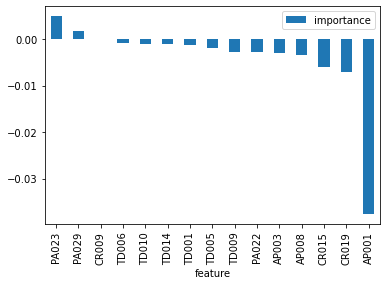

In [20]:
importances.plot.bar(x='feature')

### Predict new observations

* **predict():** the cutpoint of predict() is 0.5. It's the only sensible threshold from a mathematical viewpoint.
* **predict_proba():** (p0,p1)

In [21]:
# Here let's see the predictions
predictions = logistic_model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
logistic_model.predict_proba(X_test)

array([[0.7348002 , 0.2651998 ],
       [0.77334138, 0.22665862],
       [0.86779375, 0.13220625],
       ...,
       [0.79570624, 0.20429376],
       [0.74695944, 0.25304056],
       [0.8109255 , 0.1890745 ]])

In [23]:
y_pred = logistic_model.predict_proba(X_test)[:,1]
y_pred

array([0.2651998 , 0.22665862, 0.13220625, ..., 0.20429376, 0.25304056,
       0.1890745 ])

### Evaluate a classification decision tree model


In [24]:
# Accuracy score
predictions = logistic_model.predict(X_test[features1])
print(accuracy_score(Y_test,predictions))

0.81085


In [25]:
# ROC curve
y_pred = logistic_model.predict_proba(X_test[features1])[:,1]
roc_auc_value = roc_auc_score(Y_test,y_pred)
roc_auc_value

0.548908148042327

In [26]:
fpr, tpr, _ = roc_curve(Y_test, y_pred)
[fpr,tpr]

[array([0.00000000e+00, 6.16332820e-05, 5.54699538e-04, ...,
        9.99691834e-01, 9.99691834e-01, 1.00000000e+00]),
 array([0.       , 0.       , 0.       , ..., 0.9997351, 1.       ,
        1.       ])]

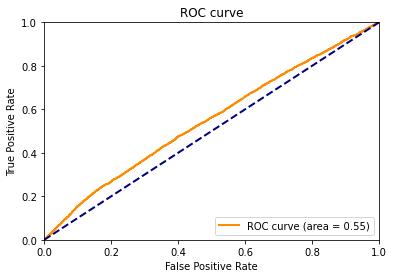

In [27]:
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

In [28]:
# Gains table
df_prep = pd.DataFrame(columns = ['actual','pred'])
df_prep['actual'] = Y_test
df_prep['pred'] =y_pred
df_prep = df_prep.sort_values(by='pred',ascending=False)
df_prep['row_id'] = range(0,0+len(df_prep))
df_prep.head()

,actual,pred,row_id
8251,0,0.782130,0
41793,0,0.625786,1
8454,0,0.615503,2
3898,0,0.611451,3
66074,0,0.597275,4


In [29]:
df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
df_prep.loc[df_prep['decile'] == 10] =9
df_prep['decile'].value_counts()

0    2000
1    2000
2    2000
3    2000
4    2000
5    2000
6    2000
7    2000
8    2000
9    2000
Name: decile, dtype: int64

In [30]:
# Create gains table
gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
gains.columns = ['count','actual']
gains

,count,actual
decile,,
0,2000,524
1,2000,443
2,2000,374
3,2000,384
4,2000,356
5,2000,363
6,2000,350
7,2000,338
8,2000,328


In [31]:
gains['non_actual'] = gains['count'] - gains['actual']
gains['cum_count'] = gains['count'].cumsum()
gains['cum_actual'] = gains['actual'].cumsum()
gains['cum_non_actual'] = gains['non_actual'].cumsum()
gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
gains['if_random'] = np.max(gains['cum_actual']) /10
gains['if_random'] = gains['if_random'].cumsum()
gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
gains

,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,2000,524,1476,2000,524,1476,0.14,0.09,377.5,1.39,5.0,26.20
1,2000,443,1557,4000,967,3033,0.26,0.19,755.0,1.28,7.0,24.18
2,2000,374,1626,6000,1341,4659,0.36,0.29,1132.5,1.18,7.0,22.35
3,2000,384,1616,8000,1725,6275,0.46,0.39,1510.0,1.14,7.0,21.56
4,2000,356,1644,10000,2081,7919,0.55,0.49,1887.5,1.10,6.0,20.81
5,2000,363,1637,12000,2444,9556,0.65,0.59,2265.0,1.08,6.0,20.37
6,2000,350,1650,14000,2794,11206,0.74,0.69,2642.5,1.06,5.0,19.96
7,2000,338,1662,16000,3132,12868,0.83,0.79,3020.0,1.04,4.0,19.58
8,2000,328,1672,18000,3460,14540,0.92,0.90,3397.5,1.02,2.0,19.22


<AxesSubplot:xlabel='decile'>

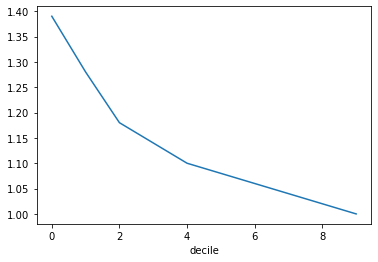

In [32]:
def gains_table(Y_test,y_pred):
    df_prep = pd.DataFrame(columns = ['actual','pred'])
    df_prep['actual'] = Y_test
    df_prep['pred'] =y_pred
    df_prep = df_prep.sort_values(by='pred',ascending=False)
    df_prep['row_id'] = range(0,0+len(df_prep))
    df_prep.head()

    df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
    df_prep.loc[df_prep['decile'] == 10] =9
    df_prep['decile'].value_counts()

    # Create gains table
    gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
    gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
    return(gains)
    
gains = gains_table(Y_test,y_pred)
gains
gains['lift'].plot.line()

<AxesSubplot:xlabel='decile'>

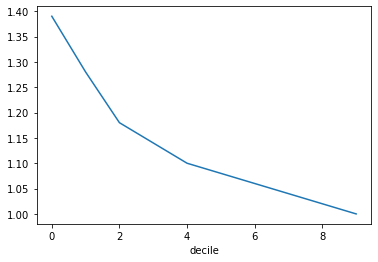

In [33]:
# Cumulative lift
gains['lift'].plot.line()

<AxesSubplot:ylabel='actual'>

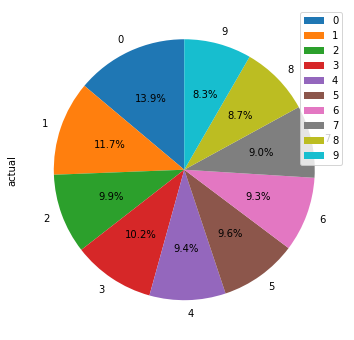

In [34]:
gains.plot.pie(y='actual',figsize=(6,6),autopct = '%1.1f%%', startangle=90)

# Section 3: Logistic regression model with FE

### Split the train and test dataset

In [35]:
train = pd.concat([X_train, Y_train], axis=1)
len(train)

60000

In [36]:
test = pd.concat([X_test, Y_test], axis=1)
len(test)

20000

### Bin the train and test dataset

In [37]:
def binning(var, train, test):
    # Define the extreme values 
    extreme_val = [-99,-98,-1]
    
    # Transfer the continuous variable to categorical binned variables 
    s,b = pd.qcut(train[var], 10, duplicates='drop',retbins=True)

    train[var+'_bin'] = s.cat.add_categories('NoData')

    # Categorize NA in a new category -- 'NoData'
    train[var+'_bin'] = train[var+'_bin'].fillna('NoData').astype(str)
    
    # Fit the extreme values in a new category -- 'extreme_val'
    # df.loc[df[var].isin(extreme_val), var+'_bin']='extreme_val'
    # Fit the extreme values into single category
    train.loc[train[var]==-99, var+'_bin']=-99
    train.loc[train[var]==-1, var+'_bin']=-1
    train.loc[train[var]==-98, var+'_bin']=-98
    
    # Count the number of values in each category
    train[var+'_bin'].value_counts(dropna=False)
    
    # Use the binning range in train dataset to cut the test data
    # Return the list of the bins in training data set and applied it into test set
    test[var+'_bin'] = pd.cut(test[var], bins=b, duplicates='drop').cat.add_categories('NoData')
    
    # Categorize NA in a new category -- 'NoData'
    test[var+'_bin'] = test[var+'_bin'].fillna('NoData').astype(str)
    
    # Put the extreme value in specific categories
    test.loc[test[var]==-99, var+'_bin']=-99
    test.loc[test[var]==-1, var+'_bin']=-1
    test.loc[test[var]==-98, var+'_bin']=-98

for i in features1:
    binning(i, train, test)

features_bin = [f + '_bin' for f in features1]
features_bin

['AP001_bin',
 'AP003_bin',
 'AP008_bin',
 'CR009_bin',
 'CR015_bin',
 'CR019_bin',
 'PA022_bin',
 'PA023_bin',
 'PA029_bin',
 'TD001_bin',
 'TD005_bin',
 'TD006_bin',
 'TD009_bin',
 'TD010_bin',
 'TD014_bin']

### Show the distribution of the train and test dataset

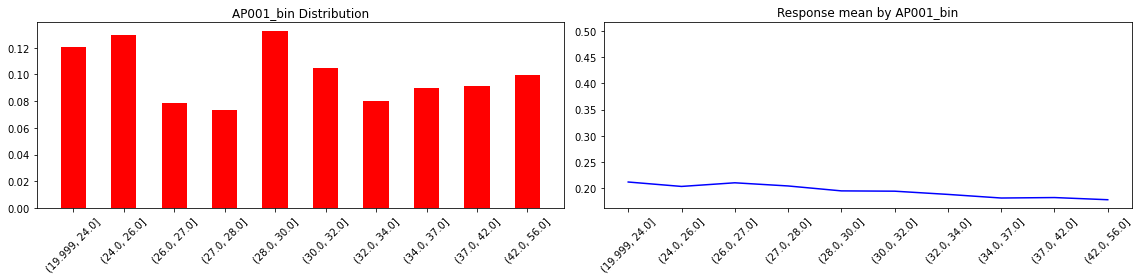

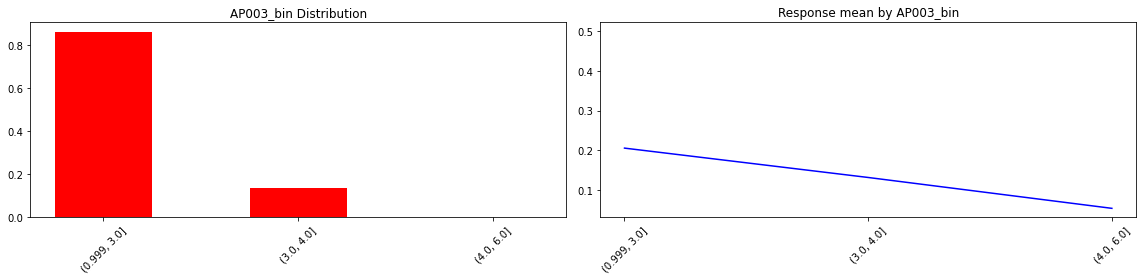

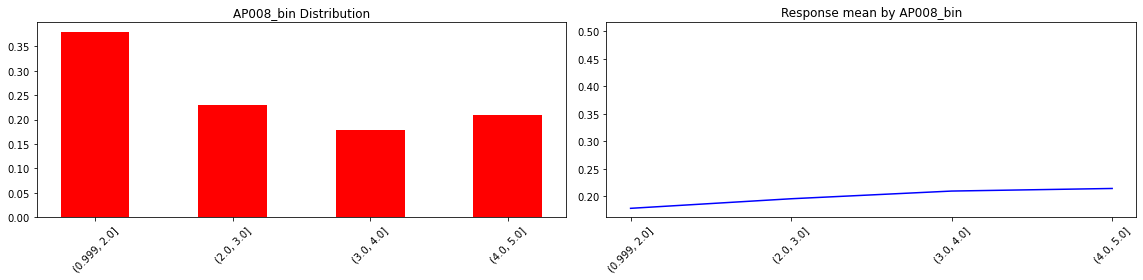

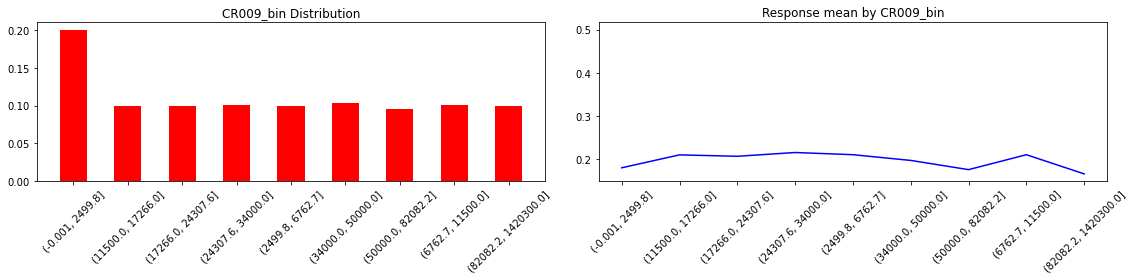

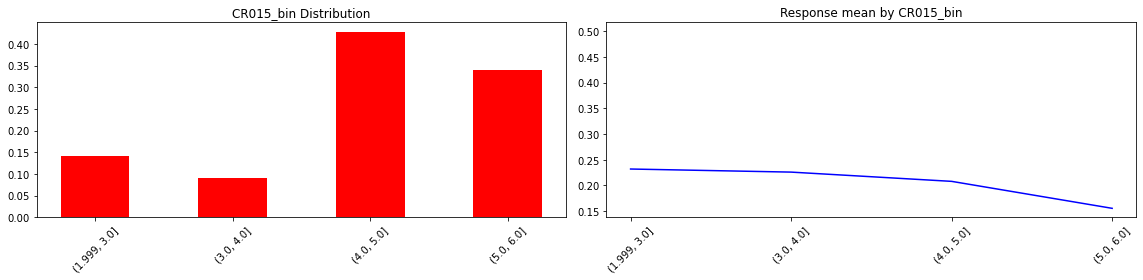

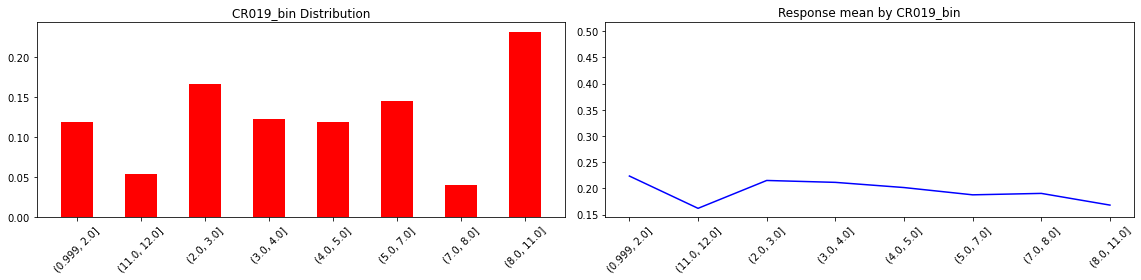

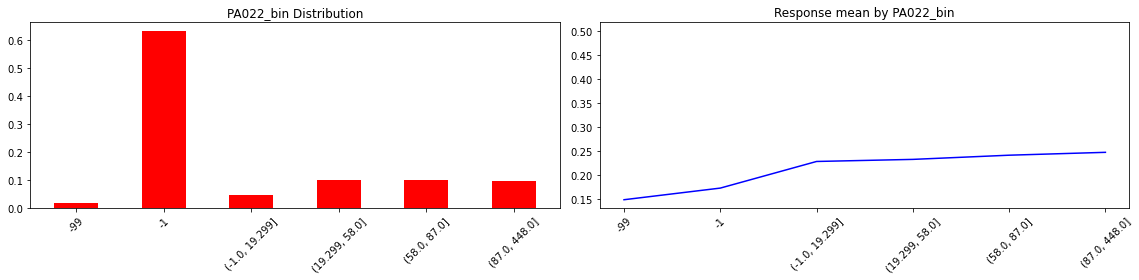

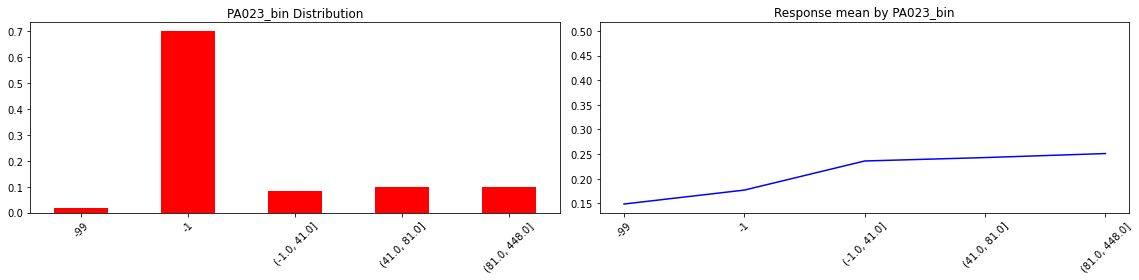

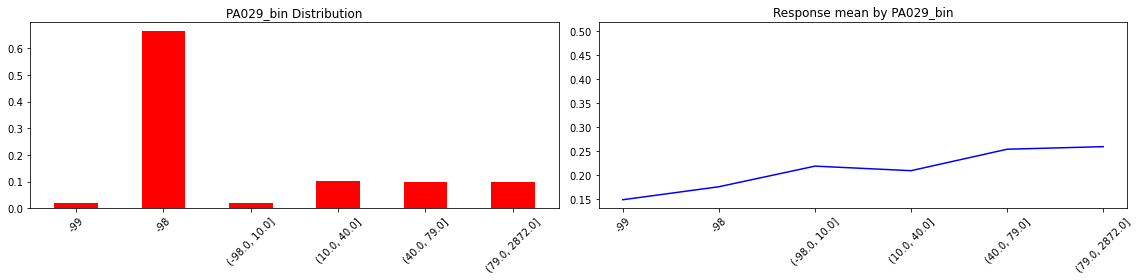

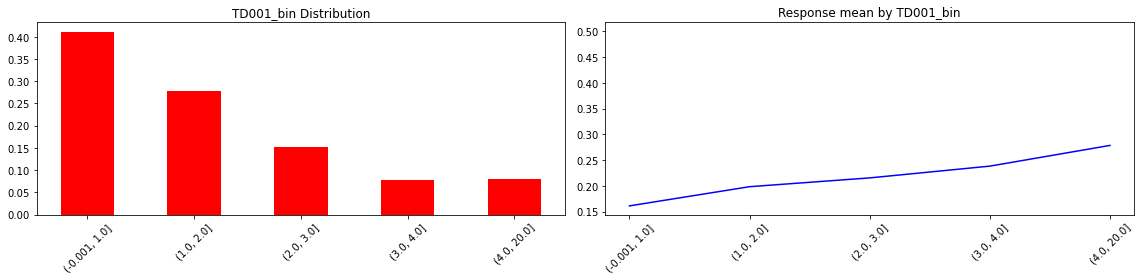

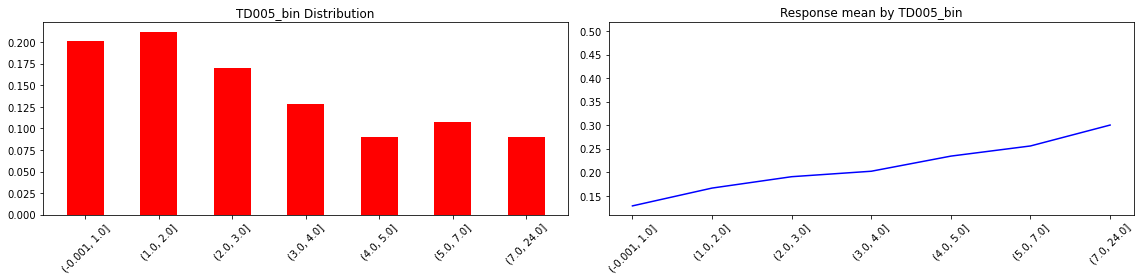

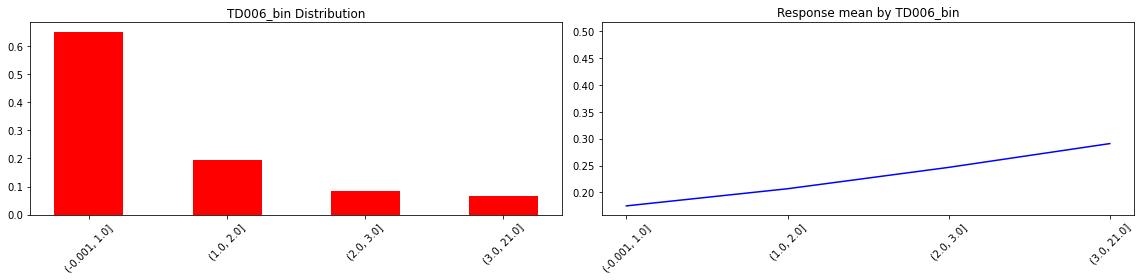

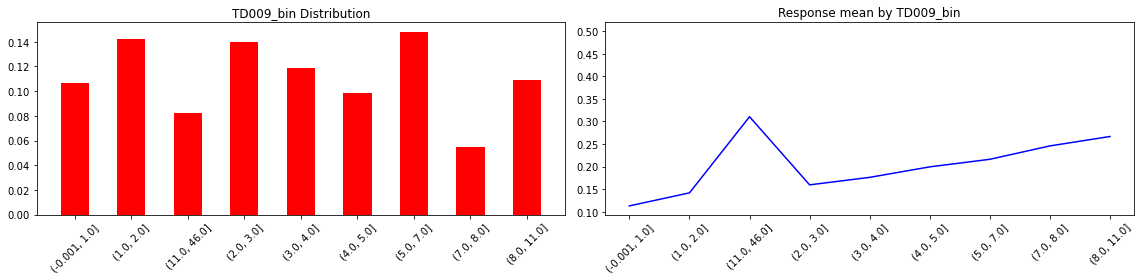

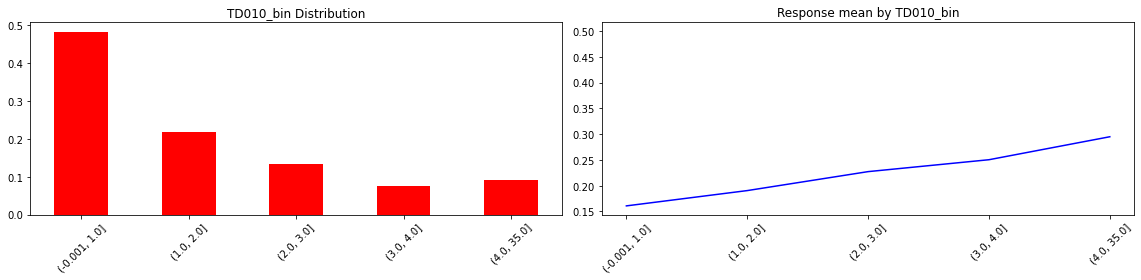

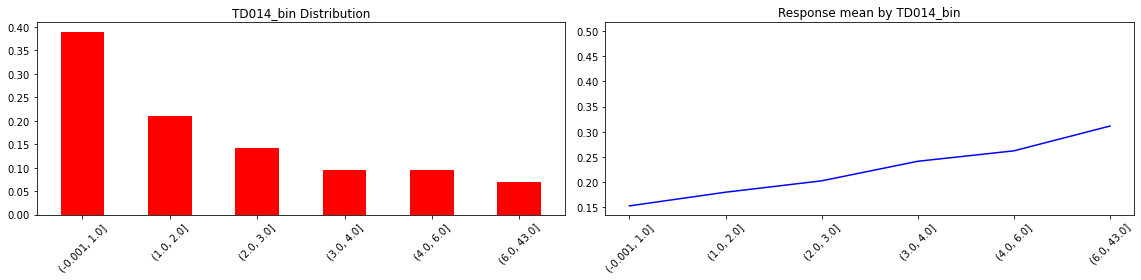

In [38]:
def plot_X_and_Y(var):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np

    z= train.groupby(var)['loan_default'].agg(['count','mean']).reset_index() 
    z['count_pcnt'] = z['count']/z['count'].sum()
    x = z[var]
    y_mean = z['mean']
    count_pcnt = z['count_pcnt']
    ind = np.arange(0, len(x))
    width = .5

    fig = plt.figure(figsize=(16,4))
    plt.subplot(121)
    plt.bar(ind, count_pcnt, width, color='r')
    #plt.ylabel('X')
    plt.title(var + ' Distribution')
    plt.xticks(ind,x.tolist(), rotation=45)

    plt.subplot(122)
    #plt.bar(ind, y_mean, width, color='b')
    plt.plot(ind, y_mean, width, color='b')
    #plt.ylabel('Y by X')
    plt.xticks(ind,x.tolist(), rotation=45)
    plt.tight_layout()
    plt.title('Response mean by ' + var)
    plt.show()
    
for i in features_bin:
    plot_X_and_Y(i)  

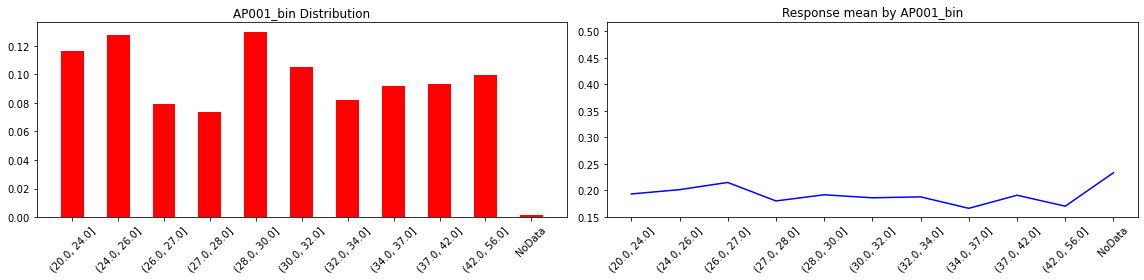

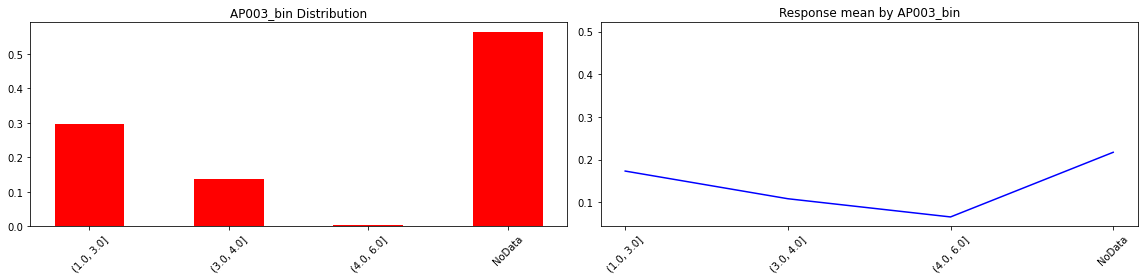

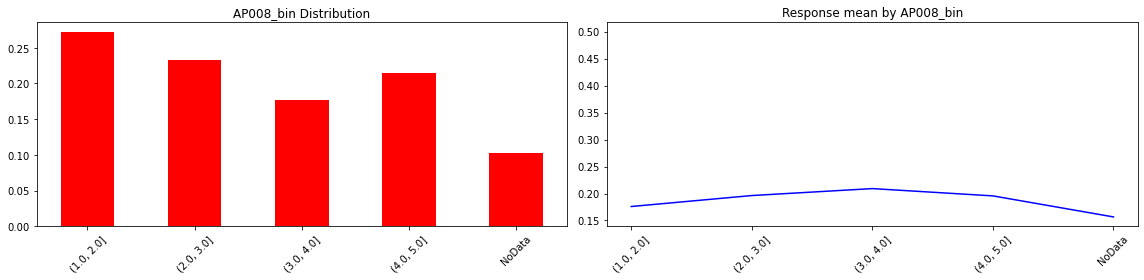

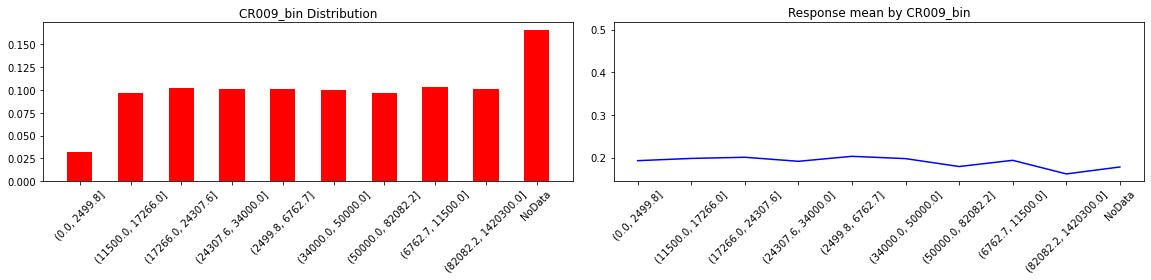

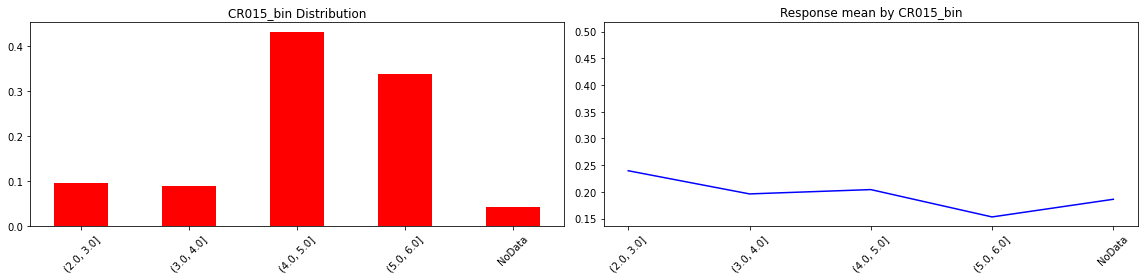

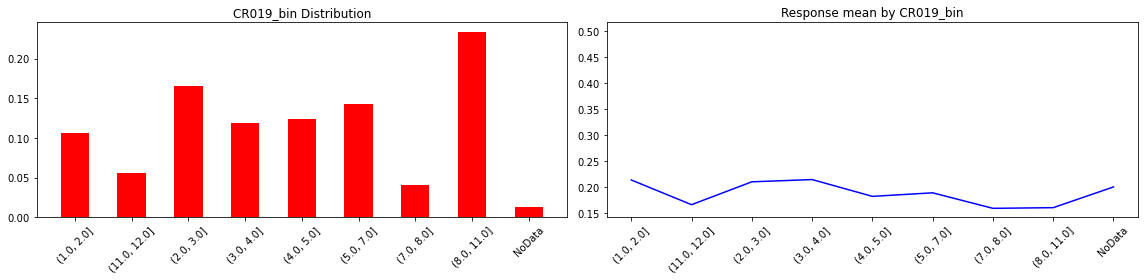

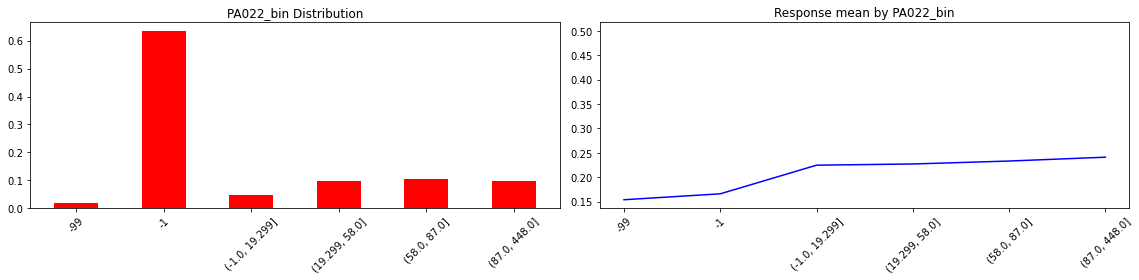

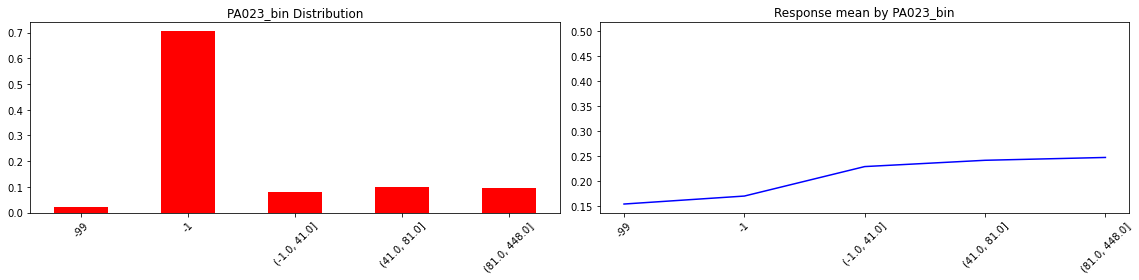

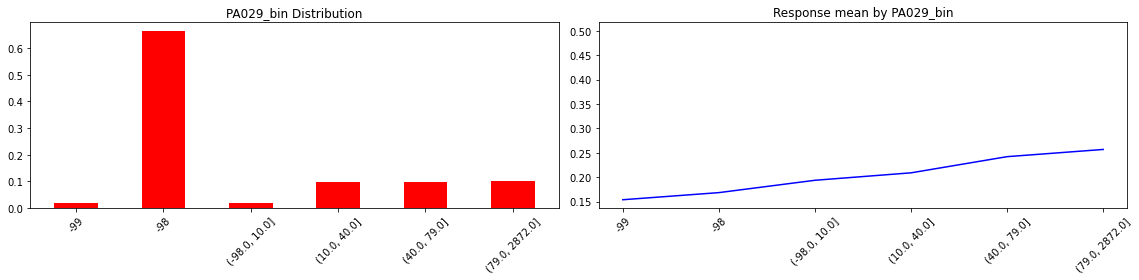

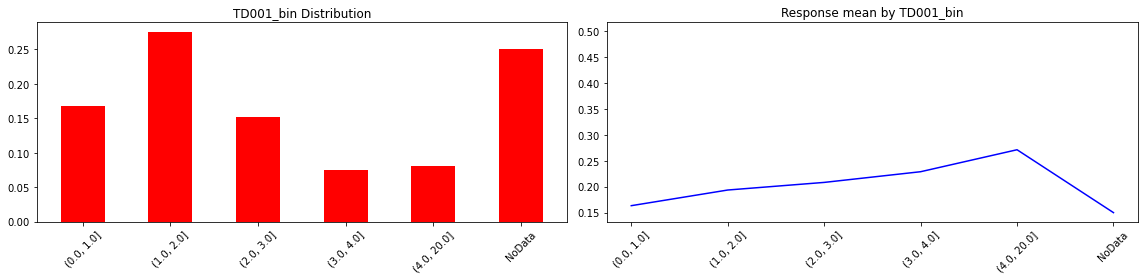

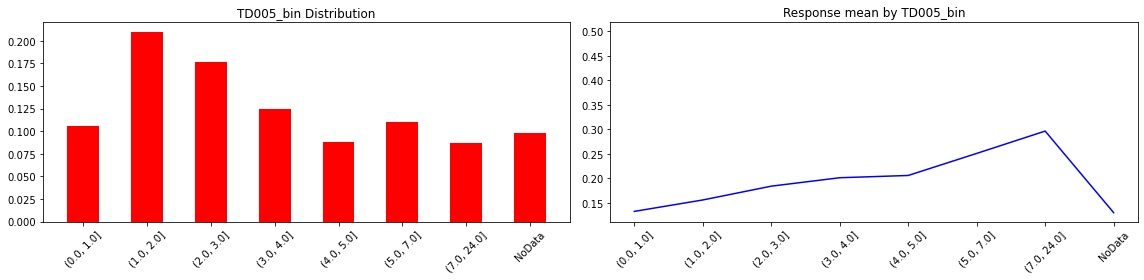

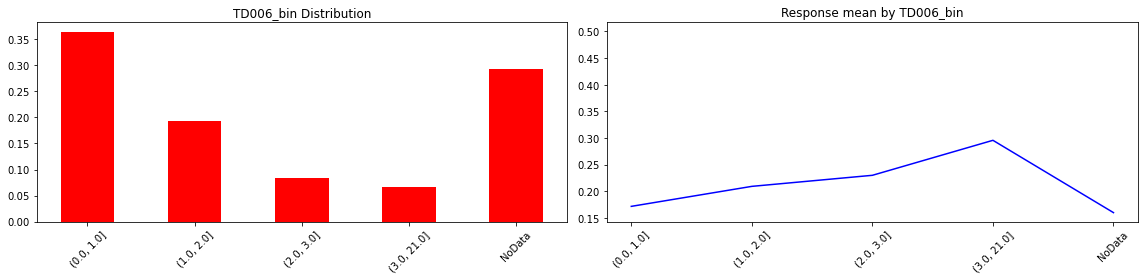

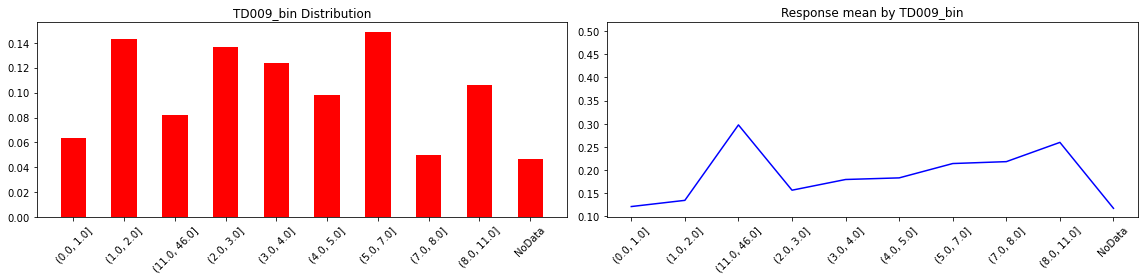

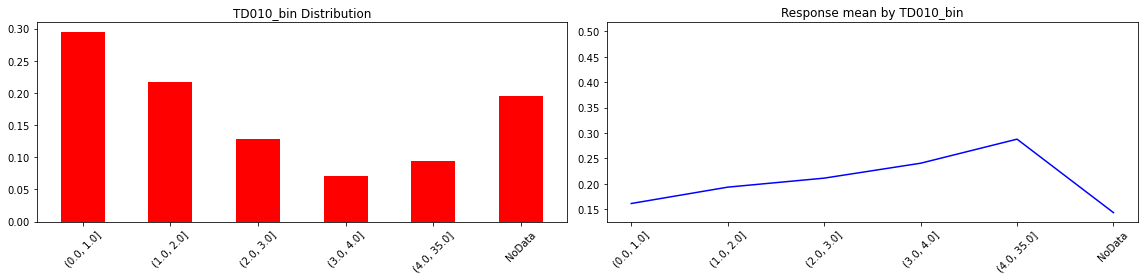

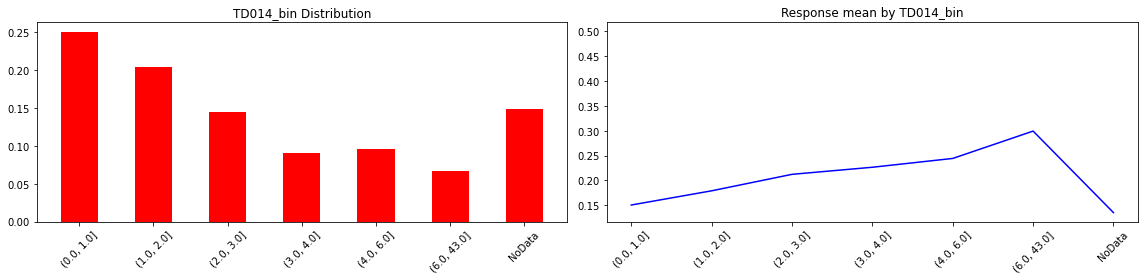

In [39]:
def plot_X_and_Y(var):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np

    z= test.groupby(var)['loan_default'].agg(['count','mean']).reset_index() 
    z['count_pcnt'] = z['count']/z['count'].sum()
    x = z[var]
    y_mean = z['mean']
    count_pcnt = z['count_pcnt']
    ind = np.arange(0, len(x))
    width = .5

    fig = plt.figure(figsize=(16,4))
    plt.subplot(121)
    plt.bar(ind, count_pcnt, width, color='r')
    #plt.ylabel('X')
    plt.title(var + ' Distribution')
    plt.xticks(ind,x.tolist(), rotation=45)

    plt.subplot(122)
    #plt.bar(ind, y_mean, width, color='b')
    plt.plot(ind, y_mean, width, color='b')
    #plt.ylabel('Y by X')
    plt.xticks(ind,x.tolist(), rotation=45)
    plt.tight_layout()
    plt.title('Response mean by ' + var)
    plt.show()
    
for i in features_bin:
    plot_X_and_Y(i) 

### Create WOE X_train and apply to the test dataset

In [40]:
features_bin = ['AP001_bin', 'AP003_bin', 'AP008_bin', 'CR009_bin', 'CR015_bin', 'CR019_bin', 'PA022_bin', 'PA023_bin', 'PA029_bin', 'TD001_bin', 'TD005_bin', 'TD006_bin', 'TD009_bin', 'TD010_bin', 'TD014_bin']

In [41]:
# Create WOE function
def WOE(var, train):
    train[var] = train[var].fillna('NoData')
    k = train[[var,'loan_default']].groupby(var)['loan_default'].agg(['count','sum']).reset_index()
    k.columns = [var,'Count','Good']
    k['Bad'] = k['Count'] - k['Good']
    k['Good %'] = (k['Good'] / k['Good'].sum()*100).round(2)
    k['Bad %'] = (k['Bad'] / k['Bad'].sum()*100).round(2)
    k[var+'_WOE'] = np.log(k['Good %'] / k['Bad %']).round(2)
    k = k.sort_values(by=var+'_WOE')
    
    return(k)

In [42]:
for f in features_bin:
    try:
        k = WOE(f, train)
        train[f+'_WOE'] = train[f].map(k.set_index(f)[f+'_WOE'])
        train[f+'_WOE'] = train[f+'_WOE'].fillna(k[f+'_WOE'].iloc[-1])
        test[f+'_WOE'] = test[f].map(k.set_index(f)[f+'_WOE'])
        test[f+'_WOE'] = test[f+'_WOE'].fillna(k[f+'_WOE'].iloc[-1])
        # Merge WOE variable from training dataset to test dataset
        test[f+'_WOE'] = test[f+'_WOE'].fillna(train[f+'_WOE'].iloc[-1])
    except:
        pass

In [43]:
features_WOE = ['AP001_bin_WOE', 'AP003_bin_WOE', 'AP008_bin_WOE', 'CR009_bin_WOE', 'CR015_bin_WOE', 'CR019_bin_WOE', 'PA022_bin_WOE', 'PA023_bin_WOE', 'PA029_bin_WOE', 'TD001_bin_WOE', 'TD005_bin_WOE', 'TD006_bin_WOE', 'TD009_bin_WOE', 'TD010_bin_WOE', 'TD014_bin_WOE']

In [44]:
# Define the features with WOE transformation and target variable
X_train_WOE = train[[f+'_WOE' for f in features_bin]]
Y_train = train['loan_default']

X_test_WOE = test[[f+'_WOE' for f in features_bin]]

### Build a logistic regression model

In [45]:
# First, specify the model
logistic_model = LogisticRegression(max_iter=1000) 

# Then, train the model
logistic_model.fit(X_train_WOE,Y_train)

LogisticRegression(max_iter=1000)

### Show the Importance of the "key questions" with the "variable importance"

In [46]:
importance = logistic_model.coef_[0]
importances = pd.DataFrame({'feature': X_train_WOE.columns, 'importance': logistic_model.coef_[0]})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
1,AP003_bin_WOE,1.076282
4,CR015_bin_WOE,0.908148
2,AP008_bin_WOE,0.877837
12,TD009_bin_WOE,0.528091
8,PA029_bin_WOE,0.444584
14,TD014_bin_WOE,0.443460
7,PA023_bin_WOE,0.315068
10,TD005_bin_WOE,0.284252
3,CR009_bin_WOE,0.246887
5,CR019_bin_WOE,0.193623


<AxesSubplot:xlabel='feature'>

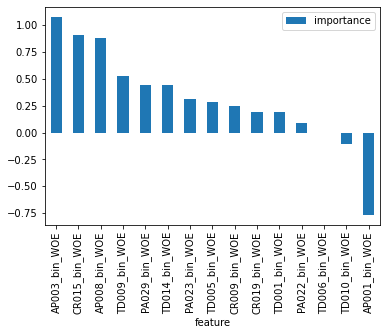

In [47]:
importances.plot.bar(x='feature')

### Predict new observations

* **predict():** the cutpoint of predict() is 0.5. It's the only sensible threshold from a mathematical viewpoint.
* **predict_proba():** (p0,p1)

In [48]:
predictions = logistic_model.predict(X_test_WOE)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
logistic_model.predict_proba(X_test_WOE)

array([[0.75970087, 0.24029913],
       [0.69786788, 0.30213212],
       [0.81961642, 0.18038358],
       ...,
       [0.82207293, 0.17792707],
       [0.85704764, 0.14295236],
       [0.73611515, 0.26388485]])

In [50]:
y_pred = logistic_model.predict_proba(X_test_WOE)[:,1]
y_pred

array([0.24029913, 0.30213212, 0.18038358, ..., 0.17792707, 0.14295236,
       0.26388485])

### Evaluate a classification decision tree model



In [51]:
# Accuracy score
predictions = logistic_model.predict(X_test_WOE[features_WOE])
print(accuracy_score(Y_test,predictions))

0.81045


In [52]:
# ROC Curve
y_pred = logistic_model.predict_proba(X_test_WOE[features_WOE])[:,1]
roc_auc_value = roc_auc_score(Y_test,y_pred)
roc_auc_value

0.5872053469933367

In [53]:
fpr, tpr, _ = roc_curve(Y_test, y_pred)
[fpr,tpr]

[array([0.00000000e+00, 6.16332820e-05, 6.16332820e-05, ...,
        9.99568567e-01, 9.99568567e-01, 1.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 2.64900662e-04, ...,
        9.99735099e-01, 1.00000000e+00, 1.00000000e+00])]

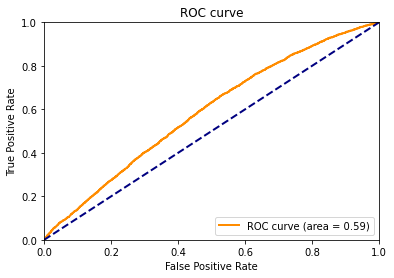

In [54]:
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

In [55]:
# Gains Table
df_prep = pd.DataFrame(columns = ['actual','pred'])
df_prep['actual'] = Y_test
df_prep['pred'] =y_pred
df_prep = df_prep.sort_values(by='pred',ascending=False)
df_prep['row_id'] = range(0,0+len(df_prep))
df_prep.head()

,actual,pred,row_id
28455,0,0.543706,0
73999,1,0.535917,1
70356,0,0.532995,2
53169,0,0.532799,3
20805,1,0.529739,4


In [56]:
df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
df_prep.loc[df_prep['decile'] == 10] =9
df_prep['decile'].value_counts()

0    2000
1    2000
2    2000
3    2000
4    2000
5    2000
6    2000
7    2000
8    2000
9    2000
Name: decile, dtype: int64

In [57]:
# Create gains table
gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
gains.columns = ['count','actual']
gains

,count,actual
decile,,
0,2000,502
1,2000,475
2,2000,458
3,2000,420
4,2000,424
5,2000,383
6,2000,350
7,2000,303
8,2000,265


In [58]:
gains['non_actual'] = gains['count'] - gains['actual']
gains['cum_count'] = gains['count'].cumsum()
gains['cum_actual'] = gains['actual'].cumsum()
gains['cum_non_actual'] = gains['non_actual'].cumsum()
gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
gains['if_random'] = np.max(gains['cum_actual']) /10
gains['if_random'] = gains['if_random'].cumsum()
gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
gains

,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,2000,502,1498,2000,502,1498,0.13,0.09,377.5,1.33,4.0,25.10
1,2000,475,1525,4000,977,3023,0.26,0.19,755.0,1.29,7.0,24.42
2,2000,458,1542,6000,1435,4565,0.38,0.28,1132.5,1.27,10.0,23.92
3,2000,420,1580,8000,1855,6145,0.49,0.38,1510.0,1.23,11.0,23.19
4,2000,424,1576,10000,2279,7721,0.60,0.48,1887.5,1.21,12.0,22.79
5,2000,383,1617,12000,2662,9338,0.71,0.58,2265.0,1.18,13.0,22.18
6,2000,350,1650,14000,3012,10988,0.80,0.68,2642.5,1.14,12.0,21.51
7,2000,303,1697,16000,3315,12685,0.88,0.78,3020.0,1.10,10.0,20.72
8,2000,265,1735,18000,3580,14420,0.95,0.89,3397.5,1.05,6.0,19.89


<AxesSubplot:xlabel='decile'>

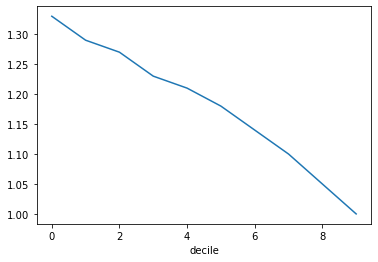

In [59]:
def gains_table(Y_test,y_pred):
    df_prep = pd.DataFrame(columns = ['actual','pred'])
    df_prep['actual'] = Y_test
    df_prep['pred'] =y_pred
    df_prep = df_prep.sort_values(by='pred',ascending=False)
    df_prep['row_id'] = range(0,0+len(df_prep))
    df_prep.head()

    df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
    df_prep.loc[df_prep['decile'] == 10] =9
    df_prep['decile'].value_counts()

    # Create gains table
    gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
    gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
    return(gains)
    
gains = gains_table(Y_test,y_pred)
gains
gains['lift'].plot.line()

<AxesSubplot:xlabel='decile'>

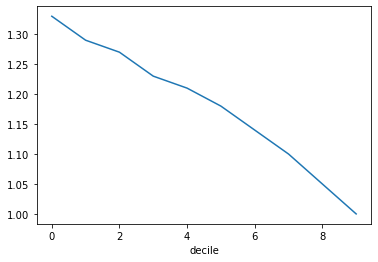

In [60]:
# Cumulative Lift
gains['lift'].plot.line()

<AxesSubplot:ylabel='actual'>

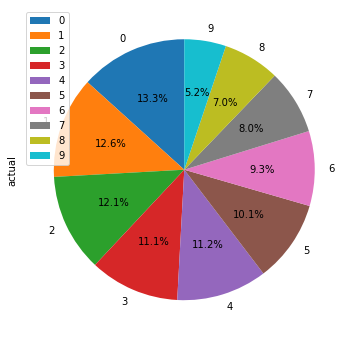

In [61]:
gains.plot.pie(y='actual',figsize=(6,6),autopct = '%1.1f%%', startangle=90)

# Section 4: Conclusion

The aim of this data analysis is to develop a model that can identify anomalies or loans with a high potential for default. The model employs 15 features, with "loan_default" serving as the target variable. Two logistic regression models were created: one utilizing the raw features, and the other implementing feature engineering (FE) techniques. This approach allows for an assessment of the impact of FE on improving model accuracy and performance.

### Feature engineering (FE) techniques ###
* Binning is a technique used to convert continuous data into categorical data by dividing the data into a specified number of bins or intervals. In this case, binning is used to categorize the continuous variables in the train and test datasets to make them more suitable for logistic regression modeling. The binned variables are used as input features in the model, which can help to improve the accuracy of the model. By using the same binning range in the train dataset to cut the test dataset, the model can also be applied to new data with the same feature engineering process. The function 'binning' defines the bins based on the distribution of the variable in the training set, and then applies the same binning to the test set to maintain consistency.

* The Weight of Evidence (WOE) function is created to transform the binned variables into a new set of variables. The WOE transformation is a popular feature engineering technique in credit risk modeling because it converts the original continuous variables into categorical variables, which can be more predictive in some cases. The WOE transformation replaces the categories of a variable with the natural logarithm of the ratio of the percentage of non-events (good) to the percentage of events (bad) for each category. By doing this, it captures the relationship between the independent variable and the dependent variable in a monotonic way, which can increase the predictive power of the model.

### Feature importances ### 
For the logistic regression model with raw features, the most important feature with highest positive coefficient is PA023 while most of the features have negative coefficients. From logistic regression model with FE, the most important feature is AP003_bin_WOE with the highest positive coefficient and only 3 features with negative coefficients. As a result, feature engineering can improve the overall performance of the model, leading to an increase in the importance of certain features. The importance of features increases after feature engineering because the new features better represent the data patterns. This can help to provide insights into which features are most relevant to the target variable, and can help in making more informed decisions about the data and the model.

##### The given results are evaluating the performance of two logistic regression models - one using raw features and the other using FE. ####

### Acurracy scores ###
* Logistic regression model with raw features = 0.81085
* Logistic regression model with FE = 0.81045

The accuracy scores for both models are very similar, with the raw features model slightly outperforming the FE model. An accuracy score of 0.81 indicates that the models correctly predicted the outcome for 81% of the test data. 

### ROC ###
* Logistic regression model with raw features = 0.5489
* Logistic regression model with FE = 0.5872

The ROC score for the FE model is higher (0.5872) than that of the raw features model (0.5489). The ROC score measures the ability of the model to correctly classify positive and negative cases, and a score of 0.5 represents a random guess, while a score of 1 represents perfect classification. In this case, the logistic regression model with FE model has a slightly better ability to distinguish between positive and negative cases compared to the raw features model.

The ROC curve is a graphical representation of the logistic regression model's performance, and the curve's proximity to the top left corner of the plot indicates a better ability to distinguish between positive and negative cases. Additionally, the AUC represents the model's performance in distinguishing between loan default and non-loan default, where a higher AUC indicates better performance. In this case, the ROC curve of the logistic regression model with raw features is closer to the baseline, while the ROC curve of the logistic regression model with FE is closer to the top left corner of the plot, indicating better performance in distinguishing between positive and negative cases.

### Gains curve and Cumulative lifts ###

Lift is a metric that assesses the performance of a predictive model by comparing the results obtained with and without the model. To visually represent the model's effectiveness, we can use cumulative gains and lift charts, which consist of a lift curve and a baseline. The larger the area between the lift curve and the baseline, the better the model. Based on the charts presented, it is evident that the logistic regression model with FE has a significantly larger area compared to the baseline, indicating a better-performing model. 

Overall, Feature engineering can increase model accuracy by improving the quality and relevance of features used for predictions. It extracts useful information from data, reduces noise, and creates more accurate representations of underlying data patterns, leading to more accurate predictions.